# Monochrome camera calibration
One of the great disadvantages with using lenses is the distortion it introduces to the image. For vacation images, this is usually not a problem, but when we use the image to describe the physical surroundings it becomes important that the images are representative of the scene it captures. An easy way to get an indication of how distorted an image is by looking at what is supposed to be straight lines since they will appear curved.

We have been given calibration data for 4 different cameras, but images from 2 cameras. The given camera pair is 2 & 3, where 2 is left, and 3 is right.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

## Multiple chessboards in one image

In [51]:
path_chess = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/calib/image_03/'

# Chessboard sizes and their counts
chessboard_sizes = {
    (11, 7): 2,  # 2 chessboards of size 11x7
    (5, 7): 10,  # 10 chessboards of size 5x7
    (15, 5): 1,  # 1 chessboard of size 15x5
}

# Expand the sizes into a list
chessboard_list = [
    (size[0], size[1]) for size, count in chessboard_sizes.items() for _ in range(count)
]

# Arrays to store object points and image points from all images
objpoints = []  # 3D points in real-world space
imgpoints = []  # 2D points in image plane

# List to store chessboards that remain undetected after both attempts
total_not_found = []

# Load images
#images = glob.glob(path_chess + 'data/*.png')
images = glob.glob(path_chess + 'data/0000000000.png')
assert images, "No images found in the specified path."

# Define termination criteria for corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 300, 0.001)

# Process each image
for fname in images:
    img = cv2.imread(fname)

    original_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Original grayscale image

    # Initialize a list of not-found chessboards
    not_found_chessboards = []

    # First attempt: Without adaptive thresholding
    gray = original_gray.copy()
    gray = cv2.equalizeHist(gray)

    for nb_vertical, nb_horizontal in chessboard_list:
        ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))

        print(ret)

        if ret:
            # Refine corner positions
            corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

            # Prepare object points
            objp = np.zeros((nb_vertical * nb_horizontal, 3), np.float32)
            objp[:, :2] = np.mgrid[0:nb_vertical, 0:nb_horizontal].T.reshape(-1, 2)

            # Append points to the lists
            objpoints.append(objp)
            imgpoints.append(corners)

            # Mask the detected region
            cv2.fillConvexPoly(gray, corners.astype(np.int32), 0)

            # Visualize detection
            img = cv2.drawChessboardCorners(img, (nb_vertical, nb_horizontal), corners, ret)
            cv2.imshow('Detected Chessboard (Without Thresholding)', img)
            if cv2.waitKey(300) & 0xFF == ord('q'):
                break
        else:
            not_found_chessboards.append((nb_vertical, nb_horizontal))
    
    cv2.destroyAllWindows()
    # Second attempt: Retry not-found chessboards with adaptive thresholding
    gray = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2
    )

    for nb_vertical, nb_horizontal in not_found_chessboards:
        ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))

        if ret:
            # Refine corner positions
            corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

            # Prepare object points
            objp = np.zeros((nb_vertical * nb_horizontal, 3), np.float32)
            objp[:, :2] = np.mgrid[0:nb_vertical, 0:nb_horizontal].T.reshape(-1, 2)

            # Append points to the lists
            objpoints.append(objp)
            imgpoints.append(corners)

            # Mask the detected region
            cv2.fillConvexPoly(gray, corners.astype(np.int32), 0)

            # Visualize detection
            img = cv2.drawChessboardCorners(img, (nb_vertical, nb_horizontal), corners, ret)
            cv2.imshow('Detected Chessboard (With Thresholding)', img)
            if cv2.waitKey(300) & 0xFF == ord('q'):
                break
        
        else:  
            # Append to total not found
            total_not_found.append((nb_vertical, nb_horizontal))


cv2.destroyAllWindows()

print("Total Not Found Chessboards:", total_not_found)

True
False
True
True
True
False
False
False
False
False
False
False
False
Total Not Found Chessboards: [(5, 7), (15, 5)]


## Function find chessboards

In [2]:
def Find_chessboards(path_chess, side):
    import cv2
    import glob
    import numpy as np

    # Chessboard sizes and their counts
    chessboard_sizes = {
        (11, 7): 2,  # 2 chessboards of size 11x7
        (5, 7): 10,  # 10 chessboards of size 5x7
        (15, 5): 1,  # 1 chessboard of size 15x5
    }

    # Expand the sizes into a list
    chessboard_list = [
        (size[0], size[1]) for size, count in chessboard_sizes.items() for _ in range(count)
    ]

    # Arrays to store object points and image points from all images
    objpoints = []  # 3D points in real-world space
    imgpoints = []  # 2D points in image plane

    # List to store chessboards that remain undetected after both attempts
    total_not_found = []

    # Load images
    images = glob.glob(path_chess + 'data/*.png')
    assert images, "No images found in the specified path."

    # Define termination criteria for corner refinement
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)

    # Process each image
    for fname in images:
        img = cv2.imread(fname)
        original_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Original grayscale image

        # Initialize a list of not-found chessboards
        not_found_chessboards = []

        # First attempt: Without adaptive thresholding
        gray = original_gray.copy()

        if side == "03":
            gray = cv2.equalizeHist(gray)

        for nb_vertical, nb_horizontal in chessboard_list:
            ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))

            if ret:
                # Refine corner positions
                corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

                # Prepare object points
                objp = np.zeros((nb_vertical * nb_horizontal, 3), np.float32)
                objp[:, :2] = np.mgrid[0:nb_vertical, 0:nb_horizontal].T.reshape(-1, 2)

                # Append points to the lists
                objpoints.append(objp)
                imgpoints.append(corners)

                # Mask the detected region
                cv2.fillConvexPoly(gray, corners.astype(np.int32), 0)

            else:
                not_found_chessboards.append((nb_vertical, nb_horizontal))
        
        cv2.destroyAllWindows()
        # Second attempt: Retry not-found chessboards with adaptive thresholding
        gray = cv2.adaptiveThreshold(
            gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2
        )

        for nb_vertical, nb_horizontal in not_found_chessboards:
            ret, corners = cv2.findChessboardCorners(gray, (nb_vertical, nb_horizontal))

            if ret:
                # Refine corner positions
                corners = cv2.cornerSubPix(gray, corners, (5, 5), (-1, -1), criteria)

                # Prepare object points
                objp = np.zeros((nb_vertical * nb_horizontal, 3), np.float32)
                objp[:, :2] = np.mgrid[0:nb_vertical, 0:nb_horizontal].T.reshape(-1, 2)

                # Append points to the lists
                objpoints.append(objp)
                imgpoints.append(corners)

                # Mask the detected region
                cv2.fillConvexPoly(gray, corners.astype(np.int32), 0)
            
            else:  
                # Append to total not found
                total_not_found.append((nb_vertical, nb_horizontal))

    print("Total Not Found Chessboards:", len(total_not_found), "out of 209")
    return objpoints, imgpoints, gray

## Test camera calibration function

Using the extracted corners we can obtain a camera matrix that contains the information needed to undistort images

In [3]:
path_chess = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/calib/image_03/'

path_seq = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/seq_01/image_03/'

objpoints, imgpoints, gray = Find_chessboards(path_chess, "03")

Total Not Found Chessboards: 42 out of 209


In [4]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None, flags = cv2.CALIB_USE_LU)
print("mtx")
print(mtx)
print("dist")
print(dist)
img = cv2.imread(path_seq + 'data/0000000000.png')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))
print("newcameramtx")
print(newcameramtx)
print("roi")
print(roi)

mtx
[[858.91651342   0.         675.7617517 ]
 [  0.         870.49109662 267.87135799]
 [  0.           0.           1.        ]]
dist
[[-0.28192531  0.05358935 -0.00140719 -0.00534635  0.00481675]]
newcameramtx
[[617.93084669   0.         637.00474743]
 [  0.         600.44593632 265.80866884]
 [  0.           0.           1.        ]]
roi
(27, 76, 1334, 362)


The last step is to actually undistort an image:

Text(0.5, 1.0, 'Undistorted image')

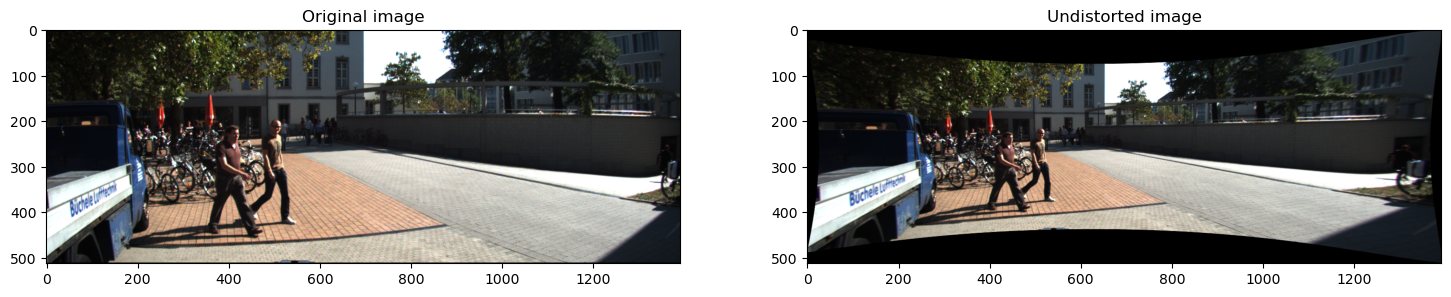

In [7]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,18))
ax[0].imshow(img[...,[2,1,0]])
ax[0].set_title('Original image')
ax[1].imshow(dst[...,[2,1,0]])
ax[1].set_title('Undistorted image')

A refining step can be to crop the image such that it doesn't contain the large black areas at the edges of the image.

(27, 76, 1334, 362)


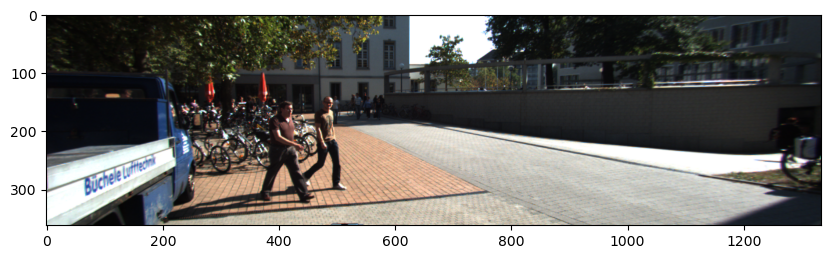

In [8]:
# crop the image
x,y,w,h = roi
print(roi)
dst = dst[y:y+h, x:x+w]
plt.figure(figsize=(10,10))
plt.imshow(dst[...,[2,1,0]])

## Read calib file

In [16]:
# Function to parse the calibration parameters from the text file
def parse_calibration_file(file_path, camera_number):
    # Initialize variables
    mtx = None
    dist = None
    R = None
    T = None

    # Open the file and read line by line
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Loop through lines and parse the relevant data
        for line in lines:
            if line.startswith("K_" + camera_number + ":"):
                # Extract K_xx matrix values
                k_values = list(map(float, line.strip().split()[1:]))
                mtx = np.array(k_values).reshape((3, 3))
            elif line.startswith("D_" + camera_number + ":"):
                # Extract D_xx distortion coefficients
                d_values = list(map(float, line.strip().split()[1:]))
                dist = np.array(d_values)
            elif line.startswith("R_" + camera_number + ":"):
                # Extract K_xx matrix values
                k_values = list(map(float, line.strip().split()[1:]))
                R = np.array(k_values).reshape((3, 3))
            elif line.startswith("T_" + camera_number + ":"):
                # Extract D_xx distortion coefficients
                d_values = list(map(float, line.strip().split()[1:]))
                T = np.array(d_values)


    return mtx, dist, R, T

## Compare camera calibration to given matrix

In [19]:
import numpy as np
import re

# Path to the calibration text file
calib_file_path = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/calib_cam_to_cam.txt'

# Parse the calibration file
provided_mtx, provided_dist, _ , _ = parse_calibration_file(calib_file_path, "02")

newcameramtx = mtx

mtx_float = np.array(newcameramtx).astype(float)
mtx_float = np.array2string(mtx_float, separator=' ', suppress_small=True)

# Compute percentage differences for the intrinsic matrix
mtx_diff = np.abs(newcameramtx - provided_mtx)
mtx_relative_error = np.zeros_like(mtx_diff)

# Avoid division by zero by checking the denominator
for i in range(mtx_diff.shape[0]):
    for j in range(mtx_diff.shape[1]):
        if provided_mtx[i, j] != 0:  # only calculate for non-zero values
            mtx_relative_error[i, j] = (mtx_diff[i, j] / provided_mtx[i, j]) * 100

mtx_accuracy = 100 - np.nanmean(mtx_relative_error)  # Avoid NaN with nanmean

# Compute percentage differences for the distortion coefficients
dist_diff = np.abs(dist - provided_dist)
dist_relative_error = (dist_diff / np.abs(provided_dist)) * 100
dist_accuracy = 100 - np.mean(dist_relative_error)

# Display results
print("")
print("Matrix Comparison:")
print("Calculated Matrix:\n", mtx_float)
print("Provided Matrix:\n", provided_mtx)
print("Percentage Error Matrix:\n", mtx_relative_error)
print(f"Intrinsic Matrix Accuracy: {mtx_accuracy:.2f}%\n")

print("Distortion Comparison:")
print("Calculated Distortion Coefficients:\n", dist)
print("Provided Distortion Coefficients:\n", provided_dist)
print("Percentage Error Distortion:\n", dist_relative_error)
print(f"Distortion Accuracy: {dist_accuracy:.2f}%\n")



Matrix Comparison:
Calculated Matrix:
 [[858.91651342   0.         675.7617517 ]
 [  0.         870.49109662 267.87135799]
 [  0.           0.           1.        ]]
Provided Matrix:
 [[956.9475   0.     693.9767]
 [  0.     952.2352 238.6081]
 [  0.       0.       1.    ]]
Percentage Error Matrix:
 [[10.24413425  0.          2.62472044]
 [ 0.          8.58444462 12.26415113]
 [ 0.          0.          0.        ]]
Intrinsic Matrix Accuracy: 96.25%

Distortion Comparison:
Calculated Distortion Coefficients:
 [[-0.28192531  0.05358935 -0.00140719 -0.00534635  0.00481675]]
Provided Distortion Coefficients:
 [-0.3750956   0.2076838   0.00043485  0.00160316 -0.07469243]
Percentage Error Distortion:
 [[ 24.8390777   74.19666556 423.60255193 433.48796985 106.44878074]]
Distortion Accuracy: -112.52%



## Rectification

### Calculate camera matrix for both cameras

In [4]:
path_chess_2 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/calib/image_02/'
path_chess_3 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/calib/image_03/'

objpoints2, imgpoints2, gray2 = Find_chessboards(path_chess_2, "02")
objpoints3, imgpoints3, gray3 = Find_chessboards(path_chess_3, "03")

ret2, mtx2, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objpoints2, imgpoints2, gray2.shape[::-1], None, None, flags = cv2.CALIB_USE_LU)
ret3, mtx3, dist3, rvecs3, tvecs3 = cv2.calibrateCamera(objpoints3, imgpoints3, gray3.shape[::-1], None, None, flags = cv2.CALIB_USE_LU)

Total Not Found Chessboards: 8 out of 209
Total Not Found Chessboards: 42 out of 209


In [11]:
print(mtx2)
print(mtx3)

[[1.10738434e+03 0.00000000e+00 6.90144791e+02]
 [0.00000000e+00 9.96677017e+02 2.56354931e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[858.91651342   0.         675.7617517 ]
 [  0.         870.49109662 267.87135799]
 [  0.           0.           1.        ]]


In [5]:
path_raw_seq_1_02 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/seq_01/image_02/'
path_raw_seq_1_03 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/seq_01/image_03/'

In [ ]:
# Path to the calibration text file
calib_file_path = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/calib_cam_to_cam.txt'

# Parse the calibration file
_, _ , R_02 , T_02 = parse_calibration_file(calib_file_path, "02")
_, _ , R_03 , T_03 = parse_calibration_file(calib_file_path, "03")

R_rel = R_03 @ np.linalg.inv(R_02)
T_rel = T_03 - R_rel @ T_02

# Image size
image_size = (1392, 512)

resize_factor = 0.6

img = cv2.imread(path_raw_seq_1_02 + 'data/0000000000.png')
h,  w = img.shape[:2]
newcameramtx2, roi2 = cv2.getOptimalNewCameraMatrix(mtx2,dist2,(w,h),1,(w,h))

img = cv2.imread(path_raw_seq_1_03 + 'data/0000000000.png')
h,  w = img.shape[:2]
newcameramtx3, roi3 = cv2.getOptimalNewCameraMatrix(mtx3,dist3,(w,h),1,(w,h))

# Compute rectification transforms
R1, R2, P1, P2, Q, roi2, roi3 = cv2.stereoRectify(
    mtx2, dist2, mtx3, dist3, image_size, R_rel, T_rel, alpha=0
)

# Generate rectification maps
map1_x, map1_y = cv2.initUndistortRectifyMap(mtx2, dist2, R1, P1, image_size, cv2.CV_32FC1)
map2_x, map2_y = cv2.initUndistortRectifyMap(mtx3, dist3, R2, P2, image_size, cv2.CV_32FC1)

# Paths to left and right images
left_images = sorted(glob.glob(path_raw_seq_1_02 + 'data/*.png'))  # Update path
right_images = sorted(glob.glob(path_raw_seq_1_03 + 'data/*.png'))  # Update path

# Process each image pair
for left_img_path, right_img_path in zip(left_images, right_images):
    # Load images
    img1 = cv2.imread(left_img_path)
    img2 = cv2.imread(right_img_path)

    # Apply rectification
    rectified_img1 = cv2.remap(img1, map1_x, map1_y, cv2.INTER_LINEAR)
    rectified_img2 = cv2.remap(img2, map2_x, map2_y, cv2.INTER_LINEAR)

    # Combine images side by side
    combined = np.hstack((rectified_img1, rectified_img2))

    # Draw epipolar lines
    num_lines = 10  # Number of epipolar lines to draw
    h, w = rectified_img1.shape[:2]
    step = h // num_lines
    for y in range(0, h, step):
        cv2.line(combined, (0, y), (w * 2, y), (0, 255, 0), 1)

    scaled_combined = cv2.resize(combined, (0, 0), fx=resize_factor, fy=resize_factor)

    # Show the combined image
    cv2.imshow('Rectified Pair with Epipolar Lines', scaled_combined)

    # Wait for a key press to continue
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

## Compare given rectification vs found

In [7]:
path_rect_seq_1_02 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_rect/seq_01/image_02/'
path_rect_seq_1_03 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_rect/seq_01/image_03/'

path_raw_seq_1_02 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/seq_01/image_02/'
path_raw_seq_1_03 = '/Users/claes/Documents/Mine dokumenter/Universitet/7.semester/Perception for autonomous systems/Final project/34759_final_project_raw/seq_01/image_03/'

In [8]:
# Paths to rectified images
rect_left_images = sorted(glob.glob(path_rect_seq_1_02 + 'data/*.png'))  # Update path
rect_right_images = sorted(glob.glob(path_rect_seq_1_03 + 'data/*.png'))  # Update path

left_images = sorted(glob.glob(path_raw_seq_1_02 + 'data/*.png'))  # Update path
right_images = sorted(glob.glob(path_raw_seq_1_03 + 'data/*.png'))  # Update path

resize_factor = 0.7


# Process each image pair
for left_img_path, right_img_path, rect_left_path, rect_right_path in zip(left_images, right_images, rect_left_images, rect_right_images):
    # Load original images
    img1 = cv2.imread(left_img_path)
    img2 = cv2.imread(right_img_path)

    # Apply rectification to original images
    rectified_img1 = cv2.remap(img1, map1_x, map1_y, cv2.INTER_LINEAR)
    rectified_img2 = cv2.remap(img2, map2_x, map2_y, cv2.INTER_LINEAR)

    # Load given rectified images
    given_rectified_img1 = cv2.imread(rect_left_path)
    given_rectified_img2 = cv2.imread(rect_right_path)

    # Combine images for display (side-by-side for both given and computed rectifications)
    combined_given = np.hstack((given_rectified_img1, given_rectified_img2))
    combined_computed = np.hstack((rectified_img1, rectified_img2))

    # Draw epipolar lines on both sets of rectified images
    num_lines = 10  # Number of epipolar lines to draw
    h, w = rectified_img1.shape[:2]
    step = h // num_lines
    for y in range(0, h, step):
        # Epipolar lines on given rectified images
        cv2.line(combined_given, (0, y), (w * 2, y), (0, 255, 0), 1)
        # Epipolar lines on computed rectified images
        cv2.line(combined_computed, (0, y), (w * 2, y), (0, 255, 0), 1)

    # Standardize dimensions
    target_width = min(combined_given.shape[1], combined_computed.shape[1])
    target_height = min(combined_given.shape[0], combined_computed.shape[0])

    # Resize both combined images to the smallest dimensions
    combined_given_resized = cv2.resize(combined_given, (target_width, target_height))
    combined_computed_resized = cv2.resize(combined_computed, (target_width, target_height))

    # Stack vertically
    combined_stack = np.vstack((combined_given_resized, combined_computed_resized))

    # Resize for display
    scaled_combined = cv2.resize(combined_stack, (0, 0), fx=resize_factor, fy=resize_factor)

    # Show the combined image
    cv2.imshow('Given and Computed Rectified Pairs with Epipolar Lines', scaled_combined)

    # Wait for a key press to continue
    if cv2.waitKey(0) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()